# Problema

## Una ciudad está estudiando su crecimiento poblacional durante los últimos años para proyectar su población futura. Se tiene el siguiente conjunto de datos, donde la variable x, representa los años transcurridos desde 2010, y la variable y la población en miles de habitantes. 

|Año (x)|Población|
|:--:|:--:|
|2010| 50|
|2011| 55|
|2014|58|
|2016|60|
|2020|88|
|2023|105|


# Instrucciones

- Realiza un análisis del crecimiento poblacional utilizando los modelos de regresión lineal y exponencial a través de un código generado en "Matlab"

- Implementar un menu utilizando una estructura de control switch/case que permita seleccionar entre las opciones de Regresion Lineal y Regresión Exponencial.

- Graficar los puntos correspondientes al conjunto de datos para cada caso seleccionado.

- Desarrollar el código necesario para realizar el ajuste según el modelo de regresion elegido

# Procedimiento

- Primero agregamos los botones de la ventana
- Luego agregamos los casos para obtener las ecuaciones de c/metodo
- Obtenemos el valor de la ecuación con Regresión Lineal y Exponencial

# Formulas

## Regresion Lineal
    

$$ y = mx + b $$

$$ m = \frac{n \sum xy - \sum x \sum y}{n \sum x^2 - (\sum x)^2} $$

$$ b = \frac{\sum y - m \sum x}{n} $$

## Regresion Exponencial


$$
A = \begin{bmatrix} 
n & \sum x \\ 
\sum x & \sum x^2 
\end{bmatrix}
$$

$$
B = \begin{bmatrix}  
b0 \\
b1 
\end{bmatrix}
$$


$$
B = \begin{bmatrix}
\sum ln(y) \\
\sum ln(y)*x 
\end{bmatrix}
$$

In [160]:
import customtkinter as ctk
from typing import Any, Optional, LiteralString, Literal, Dict,List,Callable
import numpy as np
import matplotlib.pyplot as plt
from math import e

In [ ]:
import customtkinter as ctk

class Window(ctk.CTk):
    """ Esta funcion contiene el menú con las opciones para utilizar el método de regresión lineal o exponencial
    Parameters
    ----------
    `x` : List[float|int]
        Arreglo de los valores de x
    `y` : List[float|int]
        Arreglo de los valores de y

    Atributes
    ---------
    `seleccion` : str
        Corresponde a la selección del metodo, si se tomo regresion Lineal o exponencial
    `ecucacion` : str
        Corresponde a la ecuacion de salida, como producto del metodo utilizado

    """
    def __init__(ventana,x:List[float|int], y:List[float|int]):
        super().__init__()
        #Se define el titulo y algunas de las propiedades de la ventana
        ventana.title("Seleccion.regresión")
        ventana.geometry("300x300")
        ventana.valoresx:List[float|int] = np.array(x,dtype=float)
        ventana.valoresy:List[float|int] = np.array(y,dtype= float)
        ventana.seleccion:str = None
        ventana.ecuacion:str = ""
        
        #Aqui se definen los botones de la ventana#
        ventana.label1:ctk.CTkButton = ctk.CTkButton(master= ventana, text= "Regresion Lineal", command= ventana.seleccion_rl, font=("Sans Seriff", 16))
        ventana.label2:ctk.CTkButton = ctk.CTkButton(master= ventana, text= "Regresion Exponencial", command= ventana.seleccion_re, font=("Sans Seriff",16))


    #Se define si es una regresion lineal o exponencial para poder cambiarla con los botones
    def seleccion_rl(ventana) -> None:
        ventana.seleccion = "LReg" #Llamar el metodo
        ventana.regresion_lineal()
        ventana.destroy()
    def seleccion_re(ventana) -> None:
        ventana.seleccion = "EReg" #Llamar el metodo
        ventana.regresion_exponencial()
        ventana.destroy()

    #Se utiliza el decorador para evitar escribir muchas veces y para manejar los errores de una forma eficiente.
    def error(message:Literal["Error al utilizar el método"]) -> Optional[Any]:
        def dec(func:Callable[...,Any]) -> Optional[Any]:
            def wr(ventana,*args,**kwargs):
                try:
                    if len(ventana.valoresx) == len(ventana.valoresy) and len(ventana.valoresx) != 0 and len(ventana.valoresy) != 0 and ventana.seleccion != None:  
                        return func(ventana,*args, **kwargs)
                    else:
                        raise Exception("Los arreglos no tienen dimensiones iguales")
                except Exception as e:
                    print(f"{message}: {e}, en el metodo/funcion {func.__name__}")
            return wr
        return dec

    def window(ventana) -> None:
        """ Este metodo inicializa la ventana con los botones

        Parameters
        ----------
        `None`
        """
        
        ventana.label1.pack(padx = 10, pady = 10)
        ventana.label2.pack(padx = 10, pady = 10)

        
        ventana.mainloop()

    @error("Error al utilizar el método")
    def regresion_lineal(ventana) -> Optional[str]:
        """ Este metodo calcula con los datos definidos la función

        Parameters
        ----------
        `None`
        """
        media_x = sum(ventana.valoresx) / len(ventana.valoresx)
        media_y = sum(ventana.valoresy) / len(ventana.valoresy)

        # Parte superior de la formula de pendiente, len significa longitud del vector y sum suma de los datos del vector
        ps_pendiente:int|float = len(ventana.valoresx) * sum(ventana.valoresx * ventana.valoresy) - sum(ventana.valoresx) * sum(ventana.valoresy)

        #Parte inferior de la formula de la pendiente
        pi_pendiente:int|float = len(ventana.valoresx) * sum(ventana.valoresx * ventana.valoresx) - (sum(ventana.valoresx) * sum(ventana.valoresx))

        #Parte de la interseccion con el eje y
        valor_b:int|float = media_y - media_x*(ps_pendiente/pi_pendiente)
        
        ventana.ecuacion = f"{ps_pendiente/pi_pendiente}*x+{valor_b}" if valor_b > 0 else f"{ps_pendiente/pi_pendiente}*x{valor_b}"

        return f"{ps_pendiente/pi_pendiente}*x+{valor_b}" if valor_b > 0 else f"{ps_pendiente/pi_pendiente}*x{valor_b}"
    

    @error("Error al utilizar el método")
    def regresion_exponencial(ventana) -> Optional[str]:
        """ Este metodo calcula la ecuacion utilizando regresion_exponencial

        Parameters
        ----------
        `None`
        """
        Ln_yvalues:List[float|int] = np.log(ventana.valoresy)  
        x_squared_values:List[float|int] = ventana.valoresx **2
        Ln_yx_values:List[float|int] = Ln_yvalues* ventana.valoresx
        
        #Creacion de Vectores A y B para encontrar los valores de B0 y B1#
        A:List[List[List[float|int]]] = np.array([
            [len(ventana.valoresx), sum(ventana.valoresx)],
            [sum(ventana.valoresx), sum(x_squared_values)]
            ], dtype= float)
        
        C:List[float|int] = np.array([sum(Ln_yvalues), sum(Ln_yx_values)]).reshape(-1,1)
        
        #Se multiplica la inversa de la matriz A con la matriz C, o puede dividirse la matriz A, con la matriz C, para encontrarse el valor de C
        B:List[List[float|int]] = np.linalg.inv(A) @ C

        B0 = e**B.flatten()[0]
        B1 = B.flatten()[1]
        
        ventana.ecuacion = f"{B0}*exp({B1}*x)" 
        
        
        return ventana.ecuacion

        


#Definir 

- Matriz con los valores de la tabla en x,y para los parametros de las funciones

In [187]:
Años:List[int] = [2010,2011,2014,2016,2020,2023]
Poblacion:List[int] = [50,55,58,60,88,105]

In [188]:
ventana = Window(x= Años,y = Poblacion)

In [189]:
ventana.window()

In [190]:
ventana.seleccion

'EReg'

In [191]:
ventana.ecuacion

'4.9041824477311624e-48*exp(0.05612778380184769*x)'

In [192]:
from sympy import sympify,lambdify,symbols,exp

In [193]:
#Agregar aqui la función de Regresion Lineal y exponencial

ecuacion = sympify(ventana.ecuacion, locals ={"exp": exp})
ecuacion

4.9041824477311624e-48*exp(0.05612778380184769*x)

In [194]:
x = symbols('x')
f_x = lambdify(x,ecuacion,"numpy")

In [195]:
x_vals = np.linspace(1,10,50)
y_vals = f_x(x_vals)

In [196]:
y_vals

array([5.18731481e-48, 5.24106840e-48, 5.29537901e-48, 5.35025241e-48,
       5.40569444e-48, 5.46171099e-48, 5.51830802e-48, 5.57549152e-48,
       5.63326760e-48, 5.69164237e-48, 5.75062206e-48, 5.81021292e-48,
       5.87042130e-48, 5.93125358e-48, 5.99271624e-48, 6.05481581e-48,
       6.11755889e-48, 6.18095214e-48, 6.24500230e-48, 6.30971618e-48,
       6.37510066e-48, 6.44116269e-48, 6.50790929e-48, 6.57534755e-48,
       6.64348464e-48, 6.71232779e-48, 6.78188434e-48, 6.85216167e-48,
       6.92316725e-48, 6.99490862e-48, 7.06739341e-48, 7.14062933e-48,
       7.21462415e-48, 7.28938575e-48, 7.36492207e-48, 7.44124113e-48,
       7.51835104e-48, 7.59626001e-48, 7.67497631e-48, 7.75450831e-48,
       7.83486446e-48, 7.91605331e-48, 7.99808347e-48, 8.08096367e-48,
       8.16470271e-48, 8.24930951e-48, 8.33479304e-48, 8.42116239e-48,
       8.50842675e-48, 8.59659539e-48])

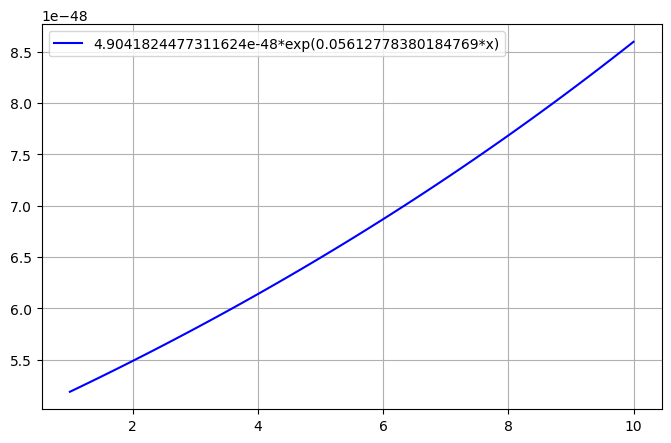

In [197]:
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label=str(ecuacion), color="b")
plt.legend()
plt.grid(True)
plt.show()
